In [1]:
import pandas as pd
import numpy as np
from bokeh.io import  show, output_notebook 

from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from math import pi
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)


In [2]:
data=pd.read_csv('C:\\Users\Acer\Downloads\Electronic Products.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            7249 non-null   object 
 1   Price                 7249 non-null   float64
 2   Product Availability  7249 non-null   object 
 3   Product Condition     7249 non-null   object 
 4   Price Currency        7249 non-null   object 
 5   Is Sale               7249 non-null   bool   
 6   Merchant              7249 non-null   object 
 7   Shipping              4277 non-null   object 
 8   Brand                 7249 non-null   object 
 9   Manufacturer          3235 non-null   object 
 10  Primary Categories    7249 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 573.5+ KB


In [4]:
data.head()

,Product ID,Price,Product Availability,Product Condition,Price Currency,Is Sale,Merchant,Shipping,Brand,Manufacturer,Primary Categories
0,AVphzgbJLJeJML43fA0o,104.99,Yes,New,USD,False,Bestbuy.com,NaN,Sanus,NaN,Electronics
1,AVpgMuGwLJeJML43KY_c,64.99,In Stock,New,USD,True,Walmart.com,Expedited,Boytone,Boytone,Electronics
2,AVpgMuGwLJeJML43KY_c,69.00,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics
3,AVpgMuGwLJeJML43KY_c,69.99,Yes,New,USD,False,Bestbuy.com,NaN,Boytone,Boytone,Electronics
4,AVpgMuGwLJeJML43KY_c,66.99,Yes,New,USD,False,Bestbuy.com,NaN,Boytone,Boytone,Electronics


In [5]:
data.shape

(7249, 11)

In [6]:
data.isnull().sum()

Product ID                 0
Price                      0
Product Availability       0
Product Condition          0
Price Currency             0
Is Sale                    0
Merchant                   0
Shipping                2972
Brand                      0
Manufacturer            4014
Primary Categories         0
dtype: int64

In [7]:
data.replace({"Yes":"In Stock", "yes":"In Stock" ,"No":"Out of Stock"}, inplace= True)

In [8]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace= True)

In [9]:
data.shape

(1856, 11)

In [10]:
data.head()

,Product ID,Price,Product Availability,Product Condition,Price Currency,Is Sale,Merchant,Shipping,Brand,Manufacturer,Primary Categories
0,AVpgMuGwLJeJML43KY_c,64.99,In Stock,New,USD,True,Walmart.com,Expedited,Boytone,Boytone,Electronics
1,AVpgMuGwLJeJML43KY_c,69.00,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics
2,AVpgMuGwLJeJML43KY_c,66.00,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics
3,AVpgMuGwLJeJML43KY_c,74.99,In Stock,New,USD,False,California Electronics,Value,Boytone,Boytone,Electronics
4,AVpgMuGwLJeJML43KY_c,69.99,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics


In [11]:
data.head()

,Product ID,Price,Product Availability,Product Condition,Price Currency,Is Sale,Merchant,Shipping,Brand,Manufacturer,Primary Categories
0,AVpgMuGwLJeJML43KY_c,64.99,In Stock,New,USD,True,Walmart.com,Expedited,Boytone,Boytone,Electronics
1,AVpgMuGwLJeJML43KY_c,69.00,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics
2,AVpgMuGwLJeJML43KY_c,66.00,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics
3,AVpgMuGwLJeJML43KY_c,74.99,In Stock,New,USD,False,California Electronics,Value,Boytone,Boytone,Electronics
4,AVpgMuGwLJeJML43KY_c,69.99,In Stock,New,USD,False,Walmart.com,Expedited,Boytone,Boytone,Electronics


In [12]:
index= data[data['Price Currency'] == 'CAD']
where = index['Price']
cad_to_usd = where * 0.73
cad_to_usd

1605    29.1927
Name: Price, dtype: float64

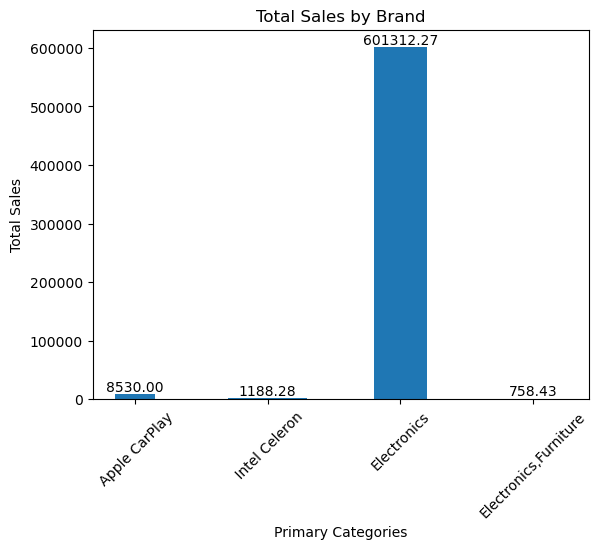

In [13]:
sale_bar= data.groupby('Primary Categories')['Price'].sum()
primary_categories= sale_bar.index
sales = sale_bar.values
bar_widths = [0.3, 0.6, 0.4, 0.5]
plt.bar(primary_categories, sales, width=bar_widths)
for i, v in enumerate(sales):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')


plt.xlabel('Primary Categories')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of Product Prices')

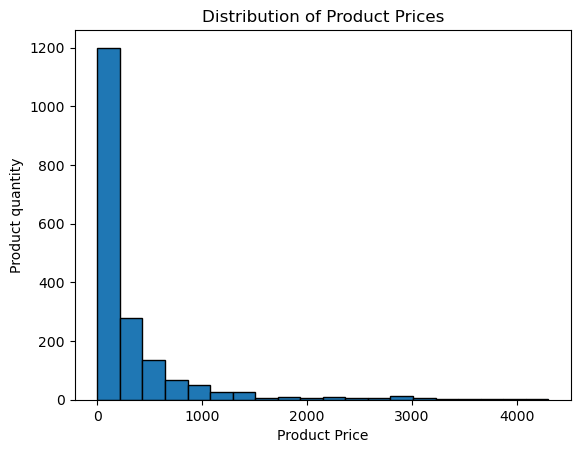

In [14]:
in_stock_products = data[data['Product Availability'] == 'In Stock']
plt.hist(data['Price'], bins=20, edgecolor='k')

plt.xlabel('Product Price')
plt.ylabel('Product quantity')
plt.title('Distribution of Product Prices')



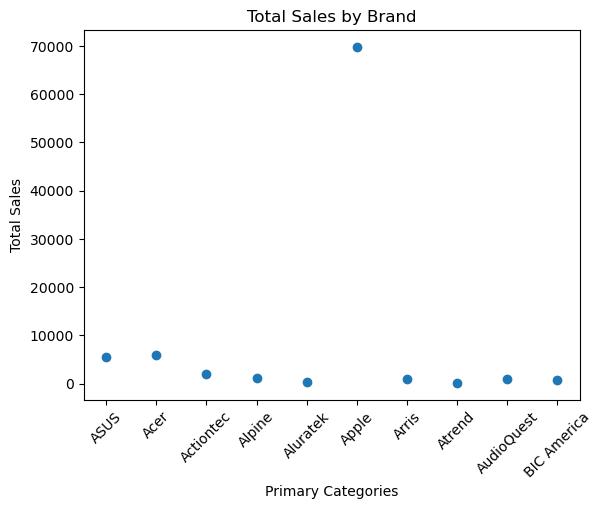

In [15]:
scatter1= data.groupby('Brand')['Price'].sum()
scatter1 = scatter1.head(10)
#ilk 10 brand goturdum
product_cond= scatter1.index
prices = scatter1.values

plt.scatter(product_cond,prices)
plt.xticks(rotation=45)
plt.xlabel('Primary Categories')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand')
plt.show()
